In [61]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [62]:
df.dtypes



Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [63]:
df.shape


(9994, 21)

In [64]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [65]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [66]:
import pandas as pd
import sqlite3 as sql
import time
from pathlib import Path

In [67]:
DATA_CSV="Cleaned_Superstore.csv"
DB_FILE = "superstore.db"
OUT_DIR = "sql_outputs"
Path(OUT_DIR).mkdir(exist_ok=True)

In [68]:
df = pd.read_csv(DATA_CSV, encoding='utf-8')
df.columns= [c.strip().replace('-','_').replace(' ','_') for c in df.columns]

In [69]:
df['Order_Date']=pd.to_datetime(df['Order_Date']).dt.strftime('%Y-%m-%d')
                            

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row_ID             9994 non-null   int64  
 1   Order_ID           9994 non-null   object 
 2   Order_Date         9994 non-null   object 
 3   Ship_Date          9994 non-null   object 
 4   Ship_Mode          9994 non-null   object 
 5   Customer_ID        9994 non-null   object 
 6   Customer_Name      9994 non-null   object 
 7   Segment            9994 non-null   object 
 8   Country            9994 non-null   object 
 9   City               9994 non-null   object 
 10  State              9994 non-null   object 
 11  Postal_Code        9994 non-null   int64  
 12  Region             9994 non-null   object 
 13  Product_ID         9994 non-null   object 
 14  Category           9994 non-null   object 
 15  Sub_Category       9994 non-null   object 
 16  Product_Name       9994 

In [71]:

# Rename for consistency
df.drop(columns={
   'Order_Month', 
   'Order_Year',
    'Order_Month_Year',
    'Ship_Delay_(Days)'
}, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [73]:
conn=sql.connect(DB_FILE)
df.to_sql("superstore_sales",conn, if_exists="replace", index=False)

9994

In [74]:
query_data="SELECT * FROM superstore_sales LIMIT 10"
full_data=pd.read_sql(query_data,conn)
print(full_data)

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
5       6  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
7       8  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
8       9  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
9      10  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   

     Customer_Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

In [75]:
Total_sales = "SELECT SUM(Sales) AS Total_Sales FROM superstore_sales"
print(pd.read_sql(Total_sales, conn))

    Total_Sales
0  2.297201e+06


In [76]:
Total_profit= "SELECT SUM(Profit) FROM superstore_sales"
print(pd.read_sql(Total_profit,conn))


   SUM(Profit)
0  286397.0217


In [77]:
def run(name,sql):
    t0=time.time()
    res=pd.read_sql(sql,conn)
    t1=time.time()
    print(f"[{name}] rows={len(res)} time={t1-t0:.3f}s")
    print(pd.read_sql(query_category, conn))
    res.to_csv(f"{OUT_DIR}/{name}.csv",index=False)
    return res

In [78]:
query_category = """
SELECT Category, Sub_Category, SUM(Sales) AS Sales
FROM superstore_sales
GROUP BY Category, Sub_Category
ORDER BY Sales DESC
"""
run("Sales_By_Category",query_category)



[Sales_By_Category] rows=17 time=0.018s
           Category Sub_Category        Sales
0        Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
2   Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
4   Office Supplies      Binders  203412.7330
5        Technology     Machines  189238.6310
6        Technology  Accessories  167380.3180
7        Technology      Copiers  149528.0300
8         Furniture    Bookcases  114879.9963
9   Office Supplies   Appliances  107532.1610
10        Furniture  Furnishings   91705.1640
11  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
13  Office Supplies          Art   27118.7920
14  Office Supplies    Envelopes   16476.4020
15  Office Supplies       Labels   12486.3120
16  Office Supplies    Fasteners    3024.2800


,Category,Sub_Category,Sales
0,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
2,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
4,Office Supplies,Binders,203412.7330
5,Technology,Machines,189238.6310
6,Technology,Accessories,167380.3180
7,Technology,Copiers,149528.0300
8,Furniture,Bookcases,114879.9963
9,Office Supplies,Appliances,107532.1610


In [79]:
query_top_customers = """
SELECT Customer_Name, SUM(Sales) AS Sales
FROM superstore_sales
GROUP BY Customer_Name
ORDER BY Sales DESC
LIMIT 5
"""
print(pd.read_sql(query_top_customers, conn))

   Customer_Name      Sales
0    Sean Miller  25043.050
1   Tamara Chand  19052.218
2   Raymond Buch  15117.339
3   Tom Ashbrook  14595.620
4  Adrian Barton  14473.571


In [80]:
query_loss_subcategories="""SELECT Category, Sub_Category,
SUM(Profit) AS TotalProfit
FROM superstore_sales
GROUP BY Sub_Category
ORDER BY TotalProfit ASC
LIMIT 5"""
run("Loss making Subcategories",query_loss_subcategories)


[Loss making Subcategories] rows=5 time=0.017s
           Category Sub_Category        Sales
0        Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
2   Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
4   Office Supplies      Binders  203412.7330
5        Technology     Machines  189238.6310
6        Technology  Accessories  167380.3180
7        Technology      Copiers  149528.0300
8         Furniture    Bookcases  114879.9963
9   Office Supplies   Appliances  107532.1610
10        Furniture  Furnishings   91705.1640
11  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
13  Office Supplies          Art   27118.7920
14  Office Supplies    Envelopes   16476.4020
15  Office Supplies       Labels   12486.3120
16  Office Supplies    Fasteners    3024.2800


,Category,Sub_Category,TotalProfit
0,Furniture,Tables,-17725.4811
1,Furniture,Bookcases,-3472.5560
2,Office Supplies,Supplies,-1189.0995
3,Office Supplies,Fasteners,949.5182
4,Technology,Machines,3384.7569


In [81]:
monthly_trend="""SELECT 
    strftime('%Y-%m', Order_Date) AS Month,
    ROUND(SUM(Sales), 2) AS Total_Sales
FROM superstore_sales
GROUP BY Month
ORDER BY Month;"""
run("Monthly Trend",monthly_trend)

[Monthly Trend] rows=48 time=0.031s
           Category Sub_Category        Sales
0        Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
2   Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
4   Office Supplies      Binders  203412.7330
5        Technology     Machines  189238.6310
6        Technology  Accessories  167380.3180
7        Technology      Copiers  149528.0300
8         Furniture    Bookcases  114879.9963
9   Office Supplies   Appliances  107532.1610
10        Furniture  Furnishings   91705.1640
11  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
13  Office Supplies          Art   27118.7920
14  Office Supplies    Envelopes   16476.4020
15  Office Supplies       Labels   12486.3120
16  Office Supplies    Fasteners    3024.2800


,Month,Total_Sales
0,2014-01,14236.90
1,2014-02,4519.89
2,2014-03,55691.01
3,2014-04,28295.35
4,2014-05,23648.29
5,2014-06,34595.13
6,2014-07,33946.39
7,2014-08,27909.47
8,2014-09,81777.35
9,2014-10,31453.39


In [82]:
top_10_customers="""SELECT 
    Customer_Name,
    ROUND(SUM(Sales), 2) AS Total_Sales
FROM superstore_sales
GROUP BY Customer_Name
ORDER BY Total_Sales DESC
LIMIT 10;"""
run("Top 10 Customers",top_10_customers)


[Top 10 Customers] rows=10 time=0.017s
           Category Sub_Category        Sales
0        Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
2   Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
4   Office Supplies      Binders  203412.7330
5        Technology     Machines  189238.6310
6        Technology  Accessories  167380.3180
7        Technology      Copiers  149528.0300
8         Furniture    Bookcases  114879.9963
9   Office Supplies   Appliances  107532.1610
10        Furniture  Furnishings   91705.1640
11  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
13  Office Supplies          Art   27118.7920
14  Office Supplies    Envelopes   16476.4020
15  Office Supplies       Labels   12486.3120
16  Office Supplies    Fasteners    3024.2800


,Customer_Name,Total_Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


In [83]:
profit_margin="""SELECT 
    Category, Sub_Category,
    ROUND(SUM(Profit) / SUM(Sales) * 100, 2) AS Profit_Margin_Percent
FROM superstore_sales
GROUP BY Category,Sub_Category
ORDER BY Profit_Margin_Percent DESC;"""
run("Profit Margin Percentage",profit_margin)


[Profit Margin Percentage] rows=17 time=0.021s
           Category Sub_Category        Sales
0        Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
2   Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
4   Office Supplies      Binders  203412.7330
5        Technology     Machines  189238.6310
6        Technology  Accessories  167380.3180
7        Technology      Copiers  149528.0300
8         Furniture    Bookcases  114879.9963
9   Office Supplies   Appliances  107532.1610
10        Furniture  Furnishings   91705.1640
11  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
13  Office Supplies          Art   27118.7920
14  Office Supplies    Envelopes   16476.4020
15  Office Supplies       Labels   12486.3120
16  Office Supplies    Fasteners    3024.2800


,Category,Sub_Category,Profit_Margin_Percent
0,Office Supplies,Labels,44.42
1,Office Supplies,Paper,43.39
2,Office Supplies,Envelopes,42.27
3,Technology,Copiers,37.20
4,Office Supplies,Fasteners,31.40
5,Technology,Accessories,25.05
6,Office Supplies,Art,24.07
7,Office Supplies,Appliances,16.87
8,Office Supplies,Binders,14.86
9,Furniture,Furnishings,14.24


In [84]:
df[df["Profit"]<0]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,9922,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,9932,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,9938,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


In [85]:
(df["Profit"]<0).sum()

1871

In [86]:
(df["Profit"] < 0).mean() * 100


18.721232739643785

In [87]:
df.duplicated().sum()

0

In [88]:
df["Order_Date"]=pd.to_datetime(df["Order_Date"])
df["Ship_Date"]=pd.to_datetime(df["Ship_Date"])

In [89]:
df[["Order_Date","Ship_Date"]].dtypes

Order_Date    datetime64[ns]
Ship_Date     datetime64[ns]
dtype: object

In [90]:
df["Order Month"]=df["Order_Date"].dt.month

In [91]:
df["Order Month"] = df["Order_Date"].dt.month
df["Order Year"] = df["Order_Date"].dt.year
df["Order Month-Year"] = df["Order_Date"].dt.to_period("M")


In [92]:
df["Ship Delay (Days)"] = (df["Ship_Date"] - df["Order_Date"]).dt.days


In [93]:
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Month-Year,Ship Delay (Days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,2016-11,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,2016-11,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,2016-06,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,2015-10,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,2015-10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,2014,2014-01,2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,2017,2017-02,5
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,2017,2017-02,5
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,2017,2017-02,5


In [94]:
df.isnull().sum()               # Final row/column count



Row_ID               0
Order_ID             0
Order_Date           0
Ship_Date            0
Ship_Mode            0
Customer_ID          0
Customer_Name        0
Segment              0
Country              0
City                 0
State                0
Postal_Code          0
Region               0
Product_ID           0
Category             0
Sub_Category         0
Product_Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Order Month          0
Order Year           0
Order Month-Year     0
Ship Delay (Days)    0
dtype: int64

In [95]:
df.to_excel("Cleaned_Superstore.xlsx", index=False)


In [96]:
df.to_csv("Cleaned_Superstore.csv", index=False)


In [97]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
%matplotlib inline  
sns.set(style="whitegrid") 

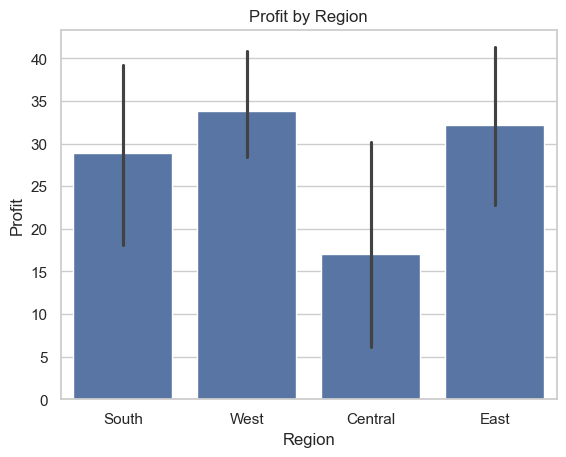

In [100]:
sns.barplot(x="Region", y="Profit",data=df)
plt.title("Profit by Region")
plt.show()


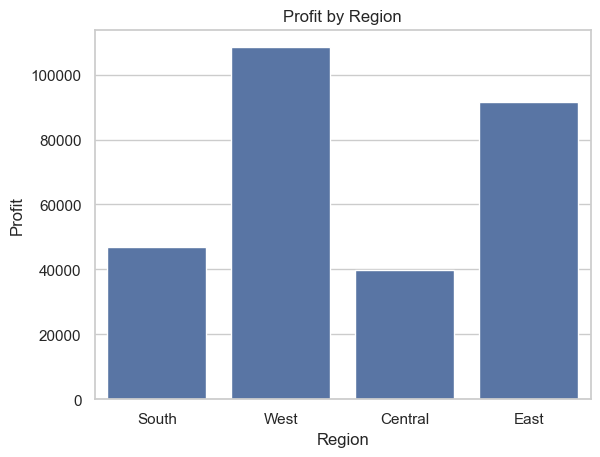

In [101]:
sns.barplot(x="Region", y="Profit",data=df,estimator=sum,errorbar=None)
plt.title("Profit by Region")
plt.show()

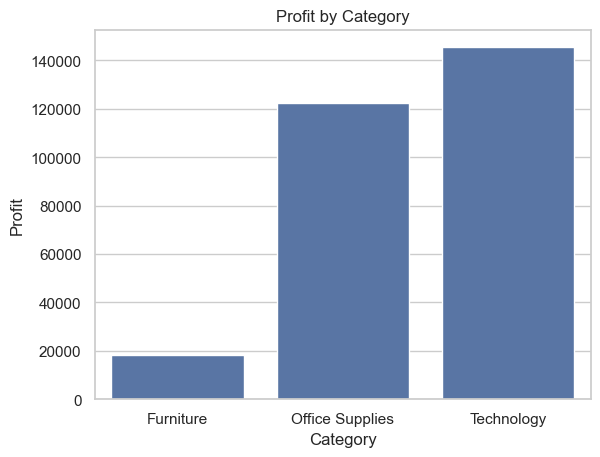

In [102]:
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, errorbar=None)
plt.title("Profit by Category")
plt.show()


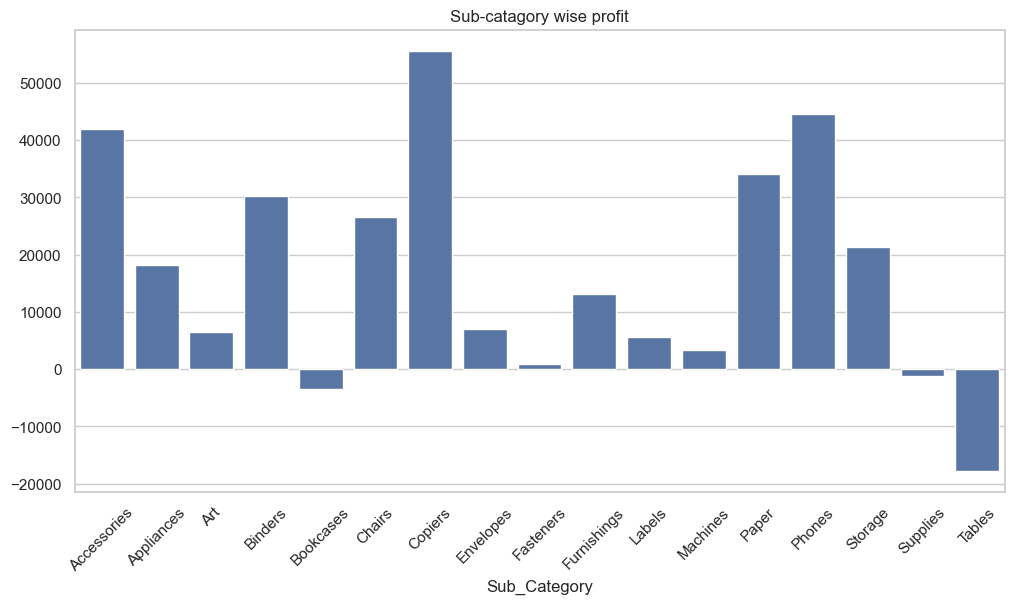

In [103]:
plt.figure(figsize=(12,6))
subcat_order = df.groupby('Sub_Category')['Profit'].sum()
sns.barplot(x=subcat_order.index,y=subcat_order.values)
plt.xticks(rotation=45)
plt.title("Sub-catagory wise profit")
plt.show()



In [104]:
monthly_sales=df.groupby('Order Month-Year')['Sales'].sum().reset_index()
monthly_sales['Order Month-Year'] = monthly_sales['Order Month-Year'].astype(str)

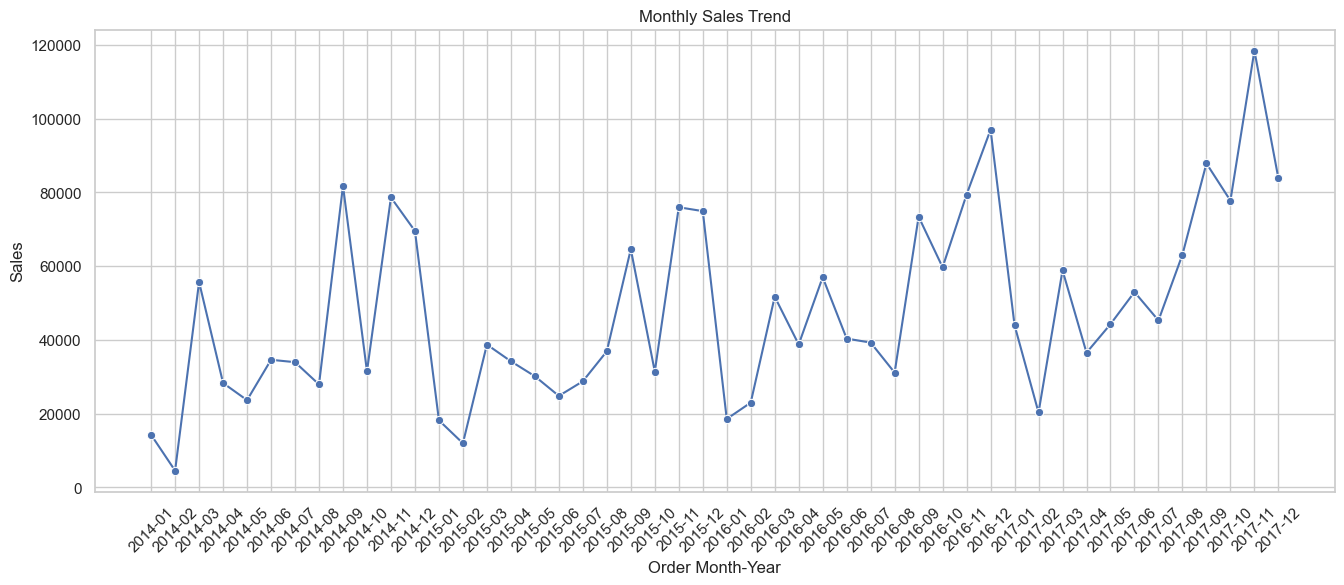

In [105]:
plt.figure(figsize=(16,6))
sns.lineplot(x='Order Month-Year', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()


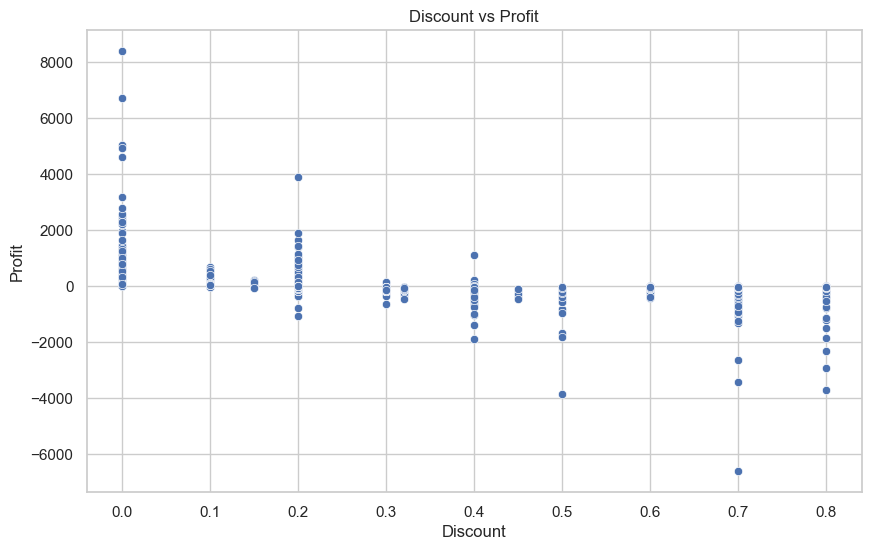

In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


In [107]:
total_sales=df['Sales'].sum()
total_profit=df['Profit'].sum()
total_orders=df['Order_ID'].nunique()

In [108]:
print(f"Total Sales:${total_sales:,.2f}")
print(f"Total Profit:${total_profit:,.2f}")
print(f"Total Orders:{total_orders}")

Total Sales:$2,297,200.86
Total Profit:$286,397.02
Total Orders:5009


In [109]:
profit_margin=(total_profit/total_sales)*100
print(f"Profit Margin: {profit_margin:.2f}%")

Profit Margin: 12.47%


In [110]:
cat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)
print("Profit by Category:")
print(cat_profit)


Profit by Category:
Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [111]:
subcat_profit = df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=True)
print("Profit by Sub-Category:")
print(subcat_profit)


Profit by Sub-Category:
Sub_Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64


In [112]:
print("Loss Making Sub-catagories:")
print(subcat_profit[subcat_profit<0])


Loss Making Sub-catagories:
Sub_Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Name: Profit, dtype: float64


In [113]:
discount_profit = df.groupby('Discount')['Profit'].sum()
print("Profit by Discount:")
print(discount_profit)


Profit by Discount:
Discount
0.00    320987.6032
0.10      9029.1770
0.15      1418.9915
0.20     90337.3060
0.30    -10369.2774
0.32     -2391.1377
0.40    -23057.0504
0.45     -2493.1111
0.50    -20506.4281
0.60     -5944.6552
0.70    -40075.3569
0.80    -30539.0392
Name: Profit, dtype: float64


In [114]:
sales_region=df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
print("Sales By region:")
print(sales_region)

Sales By region:
Region
South      391721.9050
Central    501239.8908
East       678781.2400
West       725457.8245
Name: Sales, dtype: float64


In [115]:
profit_region=df.groupby('Region')['Profit'].sum().sort_values(ascending=True)
print("Profit By region")
print(profit_region)

Profit By region
Region
Central     39706.3625
South       46749.4303
East        91522.7800
West       108418.4489
Name: Profit, dtype: float64


In [116]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Cities by Sales:")
print(top_cities)


Top 5 Cities by Sales:
City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64


In [117]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Month']=df['Order_Date'].dt.to_period('M').dt.to_timestamp()


In [118]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Month-Year,Ship Delay (Days),Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,2016-11,3,2016-11-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,2016-11,3,2016-11-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,2016-06,4,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,2015-10,7,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,2015-10,7,2015-10-01


In [123]:
monthly_sales=df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales.set_index('Order Month',inplace=True)

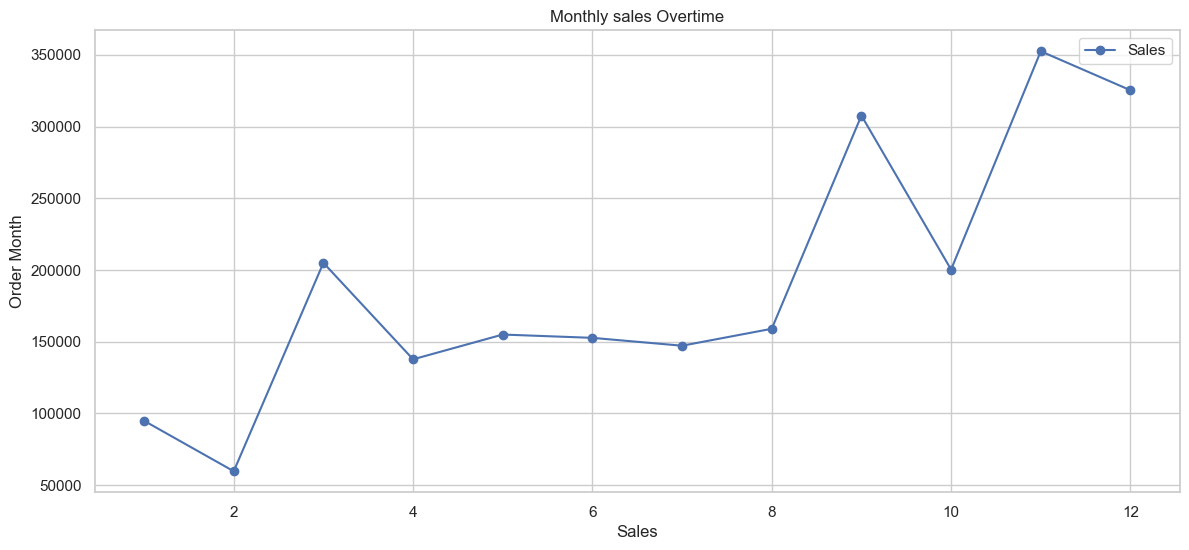

In [124]:
import matplotlib.pyplot as plt

monthly_sales.plot(figsize=(14,6),marker='o')
plt.title("Monthly sales Overtime")
plt.xlabel("Sales")
plt.ylabel("Order Month")
plt.grid(True)
plt.show()

    

In [127]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date'].dtype


dtype('<M8[ns]')

In [128]:
monthly_sales = (
    df
    .set_index('Order_Date')
    .resample('MS')['Sales']
    .sum()
)

df_ts = monthly_sales.to_frame(name='sales')
df_ts.head()
df_ts.index



DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order_Date', freq='MS')

Simple Moving Average Forcast


In [129]:
import pandas as pd

cutoff_date = df_ts.index.max() - pd.DateOffset(months=6)

train = df_ts[df_ts.index <= cutoff_date]
test  = df_ts[df_ts.index > cutoff_date]


In [130]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())
print(len(test))   # must be 6


2014-01-01 00:00:00 2017-06-01 00:00:00
2017-07-01 00:00:00 2017-12-01 00:00:00
6


SMA forcasting accuracy using Train Test Split

In [131]:
window=3
sma_series = train['sales'].rolling(window=window).mean()
last_sma_value = sma_series.iloc[-1]



In [132]:
import pandas as pd

sma_forecast = pd.Series(
    [last_sma_value] * len(test),
    index=test.index
)


In [133]:
import numpy as np

mape_sma = np.mean(
    np.abs((test['sales'] - sma_forecast) / test['sales'])
) * 100

rmse_sma = np.sqrt(
    np.mean((test['sales'] - sma_forecast) ** 2)
)



In [134]:
print(f"SMA ({window}-month) MAPE: {mape_sma:.2f}%")
print(f"SMA ({window}-month) RMSE: {rmse_sma:.2f}")


SMA (3-month) MAPE: 38.66%
SMA (3-month) RMSE: 41459.97


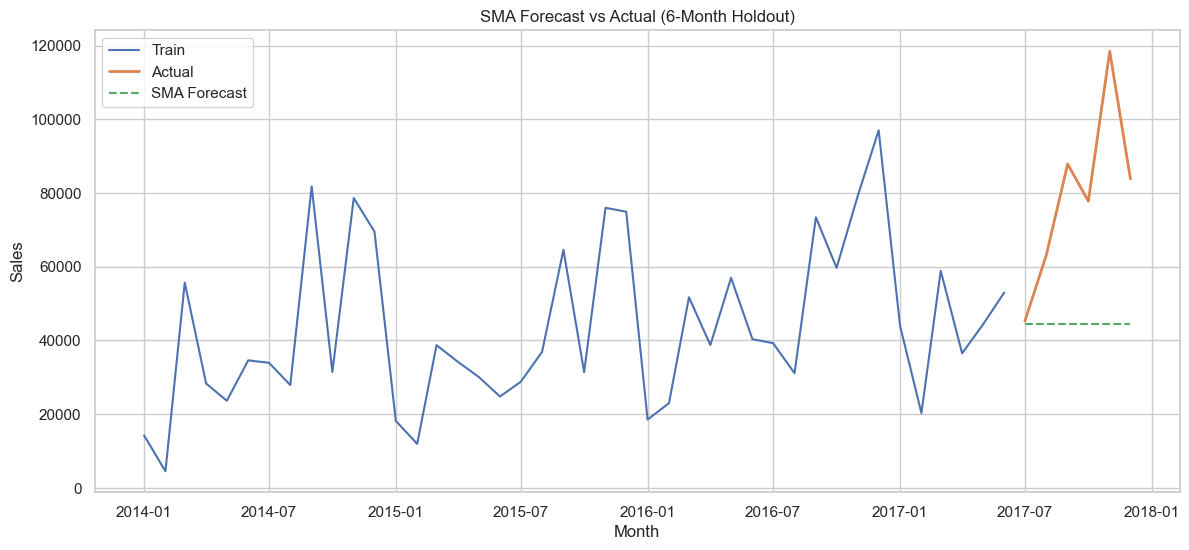

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual', linewidth=2)
plt.plot(test.index, sma_forecast, label='SMA Forecast', linestyle='--')
plt.legend()
plt.title('SMA Forecast vs Actual (6-Month Holdout)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



FORCAST ACCURACY CHECKING(TRAIN_TEST SPLIT)

In [136]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(
    train['sales']
).fit(optimized=True)


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [137]:
ses_forecast = ses_model.forecast(len(test))
ses_forecast.index = test.index  # align index


In [138]:
import numpy as np

mape_ses = np.mean(
    np.abs((test['sales'] - ses_forecast) / test['sales'])
) * 100
rmse_ses = np.sqrt(
    np.mean((test['sales'] - ses_forecast) ** 2)
)


In [139]:
print(f"SES MAPE: {mape_ses:.2f}%")
print(f"SES RMSE: {rmse_ses:.2f}")


SES MAPE: 34.91%
SES RMSE: 37290.84


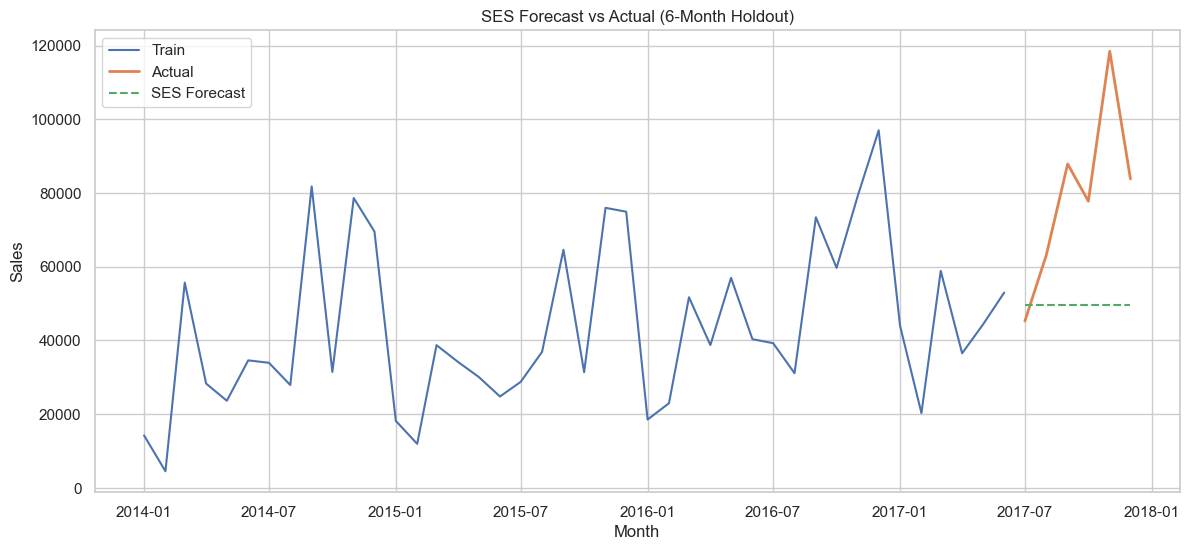

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual', linewidth=2)
plt.plot(test.index, ses_forecast, label='SES Forecast', linestyle='--')
plt.legend()
plt.title('SES Forecast vs Actual (6-Month Holdout)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Now Testing the Accuracy of Holtwinters

In [141]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(
    train['sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit(optimized=True)


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [142]:
hw_forecast = hw_model.forecast(len(test))
hw_forecast.index = test.index


In [143]:
import numpy as np

mape_hw = np.mean(
    np.abs((test['sales'] - hw_forecast) / test['sales'])
) * 100
rmse_hw = np.sqrt(
    np.mean((test['sales'] - hw_forecast) ** 2)
)


In [144]:
print(f"Holt-Winters MAPE: {mape_hw:.2f}%")
print(f"Holt-Winters RMSE: {rmse_hw:.2f}")


Holt-Winters MAPE: 15.87%
Holt-Winters RMSE: 15884.78


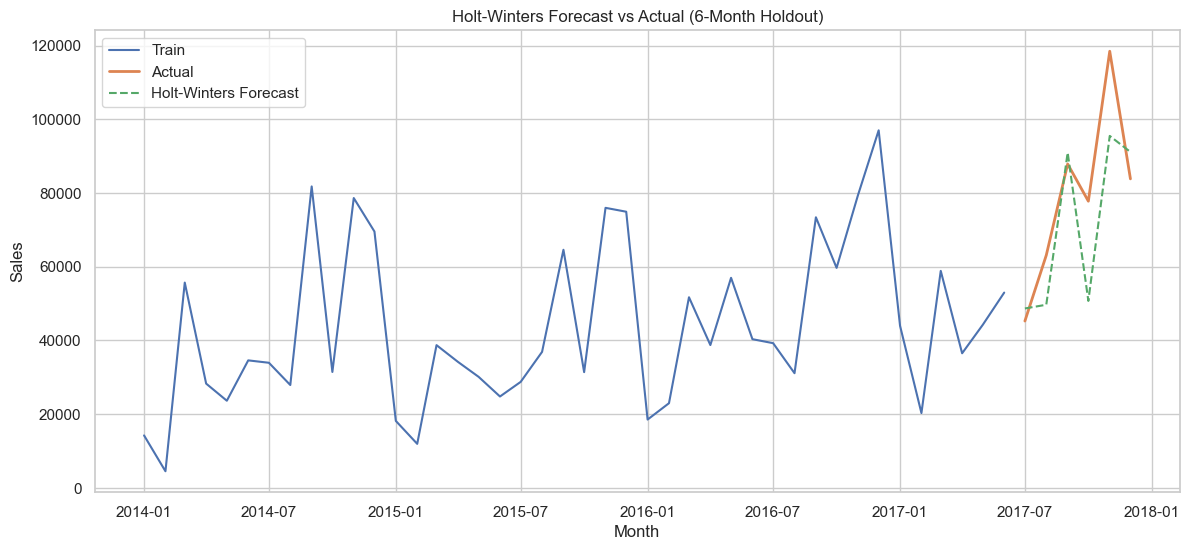

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual', linewidth=2)
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.legend()
plt.title('Holt-Winters Forecast vs Actual (6-Month Holdout)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [146]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

final_hw_model = ExponentialSmoothing(
    df_ts['sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit(optimized=True)


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [147]:
future_forecast = final_hw_model.forecast(6)

print("Forecasted sales for next 6 months:")
print(future_forecast)


Forecasted sales for next 6 months:
2018-01-01    50321.382449
2018-02-01    42480.259261
2018-03-01    74560.388209
2018-04-01    61838.886811
2018-05-01    69236.677656
2018-06-01    65358.588777
Freq: MS, dtype: float64


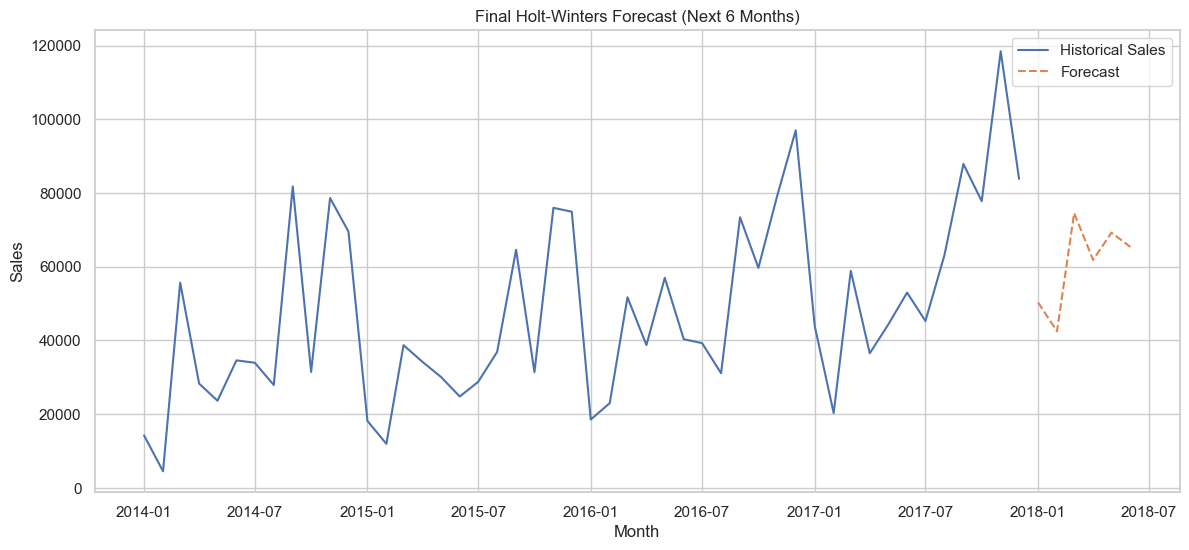

In [148]:
plt.figure(figsize=(14, 6))
plt.plot(df_ts.index, df_ts['sales'], label='Historical Sales')
plt.plot(future_forecast.index, future_forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Final Holt-Winters Forecast (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [149]:
actual_df = df_ts.reset_index()
actual_df.columns = ['month', 'sales']
actual_df['type'] = 'Actual'


In [150]:
actual_df.tail()


,month,sales,type
43,2017-08-01,63120.8880,Actual
44,2017-09-01,87866.6520,Actual
45,2017-10-01,77776.9232,Actual
46,2017-11-01,118447.8250,Actual
47,2017-12-01,83829.3188,Actual


In [151]:
future_forecast = final_hw_model.forecast(6)

forecast_df = future_forecast.reset_index()
forecast_df.columns = ['month', 'sales']
forecast_df['type'] = 'Forecast'


In [152]:
forecast_df


,month,sales,type
0,2018-01-01,50321.382449,Forecast
1,2018-02-01,42480.259261,Forecast
2,2018-03-01,74560.388209,Forecast
3,2018-04-01,61838.886811,Forecast
4,2018-05-01,69236.677656,Forecast
5,2018-06-01,65358.588777,Forecast


In [153]:
sales_forecast_df = pd.concat(
    [actual_df, forecast_df],
    ignore_index=True
)

sales_forecast_df['month'] = pd.to_datetime(sales_forecast_df['month'])
sales_forecast_df.tail(8)


,month,sales,type
46,2017-11-01,118447.825000,Actual
47,2017-12-01,83829.318800,Actual
48,2018-01-01,50321.382449,Forecast
49,2018-02-01,42480.259261,Forecast
50,2018-03-01,74560.388209,Forecast
51,2018-04-01,61838.886811,Forecast
52,2018-05-01,69236.677656,Forecast
53,2018-06-01,65358.588777,Forecast


In [154]:
import sqlite3

conn = sqlite3.connect("Retail_Forecasting.db")

sales_forecast_df.to_sql(
    'sales_forecast',
    conn,
    if_exists='replace',
    index=False
)
sales_forecast_df.to_csv('Forecast.csv')
conn.close()


In [101]:
profit_by_customer=df.groupby("Customer_Name")['Profit'].sum().sort_values(ascending=False)
print(profit_by_customer)

Customer_Name
Tamara Chand      8981.3239
Raymond Buch      6976.0959
Sanjit Chand      5757.4119
Hunter Lopez      5622.4292
Adrian Barton     5444.8055
                    ...    
Henry Goldwyn    -2797.9635
Sharelle Roach   -3333.9144
Luke Foster      -3583.9770
Grant Thornton   -4108.6589
Cindy Stewart    -6626.3895
Name: Profit, Length: 793, dtype: float64


In [102]:
profit_by_customer.head(10)

Customer_Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

In [103]:
profit_by_customer.tail(10)

Customer_Name
Natalie Fritzler   -1695.9714
Christine Phan     -1850.3029
Sean Miller        -1980.7393
Sean Braxton       -2082.7451
Nathan Cano        -2204.8072
Henry Goldwyn      -2797.9635
Sharelle Roach     -3333.9144
Luke Foster        -3583.9770
Grant Thornton     -4108.6589
Cindy Stewart      -6626.3895
Name: Profit, dtype: float64